# Campaign Performance Analysis

1. [Introduction](#Introduction)
2. [Exploratory Data Analysis](#ExploratoryDataAnalysis)
    - 2.1 [Relationship_between campaign id and lead_status_for_campaign](#)
    - 2.2 [Relationship_between city and lead_status_for_campaign](#)
    - 2.3 [Multivariate Analysis](#)
     
    
3. [Conclusion](#Conclusion)


# Introduction


This analysis presents a post-campaign review of a recent cold email initiative. The primary objective is to identify patterns in campaign performance across different cities & campaigns ids and provide recommendations for optimizing future campaign efforts. The variables used in this analysis are email addresses, the campaign it was part of, the city it was sent to, and the lead’s final status.

### Importing

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheet_id = "1pQH8fzVz-zms6poaSp-lqp_eWLWmKjfv48SV3vv22Mo"
sheet_name = "Sheet1" 
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
raw_data = pd.read_csv(url)

raw_data.head()

,email,lead_status_for_campaign,campaign_id,campaign_city
0,user0@example.com,email_sent,camp_1,Denver
1,user1@example.com,email_sent,camp_2,Phoenix
2,user2@example.com,email_opened,camp_1,Denver
3,user3@example.com,email_opened,camp_1,Denver
4,user4@example.com,email_bounced,camp_1,Dallas


### Understanding the data 

checking for missing data, duplicates and looking at the data structre to get familiarisez with the data.

In [3]:
raw_data.isna().sum()

email                       0
lead_status_for_campaign    0
campaign_id                 0
campaign_city               0
dtype: int64

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   email                     210 non-null    object
 1   lead_status_for_campaign  210 non-null    object
 2   campaign_id               210 non-null    object
 3   campaign_city             210 non-null    object
dtypes: object(4)
memory usage: 6.7+ KB


In [5]:
raw_data.duplicated().sum()

0

In [6]:
df = raw_data[[col for i, col in enumerate(raw_data.columns) if i != 1] + [raw_data.columns[1]]]
df

,email,campaign_id,campaign_city,lead_status_for_campaign
0,user0@example.com,camp_1,Denver,email_sent
1,user1@example.com,camp_2,Phoenix,email_sent
2,user2@example.com,camp_1,Denver,email_opened
3,user3@example.com,camp_1,Denver,email_opened
4,user4@example.com,camp_1,Dallas,email_bounced
...,...,...,...,...
205,user205@example.com,camp_2,Phoenix,email_bounced
206,user206@example.com,camp_3,Phoenix,email_unsubscribed
207,user207@example.com,camp_5,Phoenix,email_sent
208,user208@example.com,camp_2,Dallas,email_bounced


In [7]:
df.describe(include='all')

,email,campaign_id,campaign_city,lead_status_for_campaign
count,210,210,210,210
unique,210,5,3,5
top,user0@example.com,camp_2,Dallas,email_sent
freq,1,50,73,64


Our data appears to be clean and organized, so we can proceed with exploratory data analysis.

# Exploratory Data Analysis  <a id="ExploratoryDataAnalysis"></a>

In [8]:
df['campaign_id'].value_counts()

campaign_id
camp_2    50
camp_5    46
camp_3    40
camp_1    38
camp_4    36
Name: count, dtype: int64

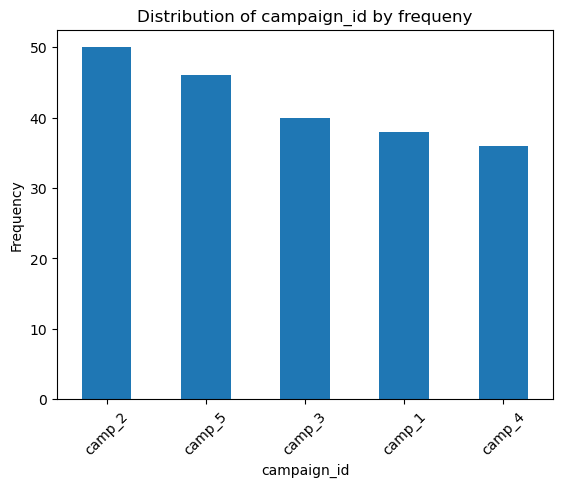

In [9]:
df['campaign_id'].value_counts().plot(kind='bar')
plt.xlabel('campaign_id')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Distribution of campaign_id by frequeny')
plt.show()

In [10]:
df['campaign_city'].value_counts()

campaign_city
Dallas     73
Phoenix    69
Denver     68
Name: count, dtype: int64

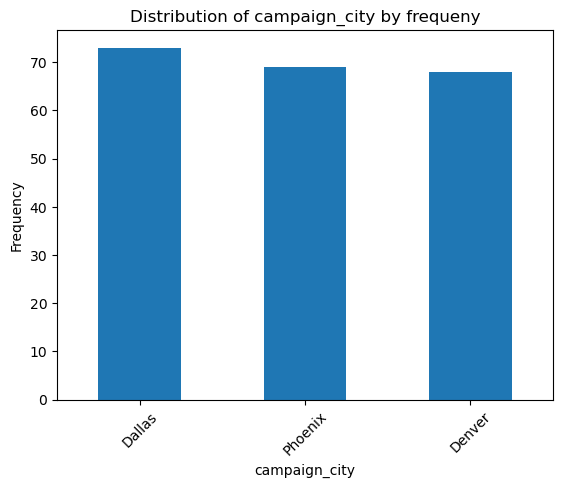

In [11]:
df['campaign_city'].value_counts().plot(kind='bar')
plt.xlabel('campaign_city')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Distribution of campaign_city by frequeny')
plt.show()

In [12]:
class_counts = df['lead_status_for_campaign'].value_counts()
class_counts

lead_status_for_campaign
email_sent            64
email_opened          63
email_bounced         41
email_replied         34
email_unsubscribed     8
Name: count, dtype: int64

In [13]:
class_percentages =((class_counts / df.shape[0]) * 100).round(2)
class_percentages

lead_status_for_campaign
email_sent            30.48
email_opened          30.00
email_bounced         19.52
email_replied         16.19
email_unsubscribed     3.81
Name: count, dtype: float64

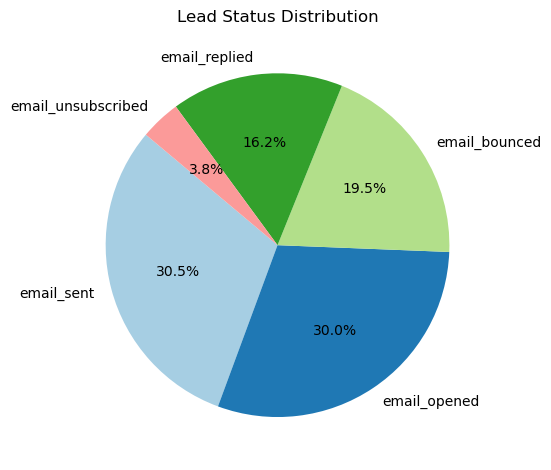

In [14]:
class_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Lead Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.savefig("lead_status_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

What we can understand from these status percentages is:
* **Email Sent (Unopened)**	30.48%	Nearly a third of recipients didn't open our email — this is our largest group which could mean subject lines or sender name might need improvement.
* **Email Opened**	30.00%	This is promising. 30% open rate is decent.
* **Email Bounced**	19.52%	This is very high — almost 1 in 5 emails didn’t even reach the inbox. We may need to clean your email list (check for invalid/old addresses).
* **Email Replied**	16.19%	This is a great engagement rate. It means our content resonated well with a portion of our leads.
* **Email Unsubscribed**	3.81%	This is acceptable especially sinceit is for cold emails. , but if it creeps above ~5%, it might signal content overload, poor targeting, or irrelevant emails.

### Relationship between campaign_id and lead_status_for_campaign  <a id="2.1Relationship_between campaign_id&lead_status_for_campaign"></a>

In [15]:
def grouping(x):
    return df.groupby('lead_status_for_campaign')[x].value_counts().unstack()

def catplot(m, n=45):
    sns.catplot( x = m, data = df, kind = 'count', hue = 'lead_status_for_campaign')
    plt.xticks(rotation = n)
    return plt.show()

In [16]:

df.groupby('lead_status_for_campaign')['campaign_id'].describe()

,count,unique,top,freq
lead_status_for_campaign,,,,
email_bounced,41,5,camp_2,13
email_opened,63,5,camp_2,17
email_replied,34,5,camp_1,10
email_sent,64,5,camp_5,18
email_unsubscribed,8,5,camp_3,3


In [17]:
grouping('campaign_id')

campaign_id,camp_1,camp_2,camp_3,camp_4,camp_5
lead_status_for_campaign,,,,,
email_bounced,6,13,8,8,6
email_opened,8,17,12,12,14
email_replied,10,5,6,6,7
email_sent,13,13,11,9,18
email_unsubscribed,1,2,3,1,1


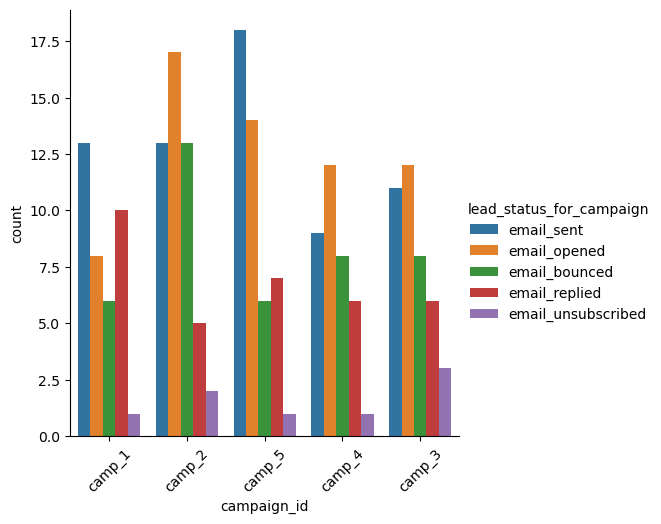

In [18]:
catplot('campaign_id')

* Campaign 2 had the highest number of emails opened (17), which indicates effective subject lines or timing. However, it also had a high number of bounces (13), which could indicate list quality issues. In contrast, Campaign 1 achieved the highest number of email replies (10), making it the most engaging in terms of lead response.

* Campaign 5 had the highest volume of emails sent (18), with strong open (14) and reply (7) counts, indicating solid overall performance. Campaign 3 and Campaign 4 showed relatively balanced metrics but with lower engagement compared to Campaign 1 and 5.

* The number of unsubscribes was low across all campaigns, which is a positive sign for content relevance and frequency.

### Relationship between campaign_id and lead_status_for_campaign

In [19]:
df.groupby('lead_status_for_campaign')['campaign_city'].describe()

,count,unique,top,freq
lead_status_for_campaign,,,,
email_bounced,41,3,Dallas,37
email_opened,63,3,Denver,26
email_replied,34,3,Phoenix,13
email_sent,64,3,Denver,28
email_unsubscribed,8,2,Phoenix,7


In [20]:
grouping('campaign_city')

campaign_city,Dallas,Denver,Phoenix
lead_status_for_campaign,,,
email_bounced,37.0,2.0,2.0
email_opened,15.0,26.0,22.0
email_replied,9.0,12.0,13.0
email_sent,11.0,28.0,25.0
email_unsubscribed,1.0,NaN,7.0


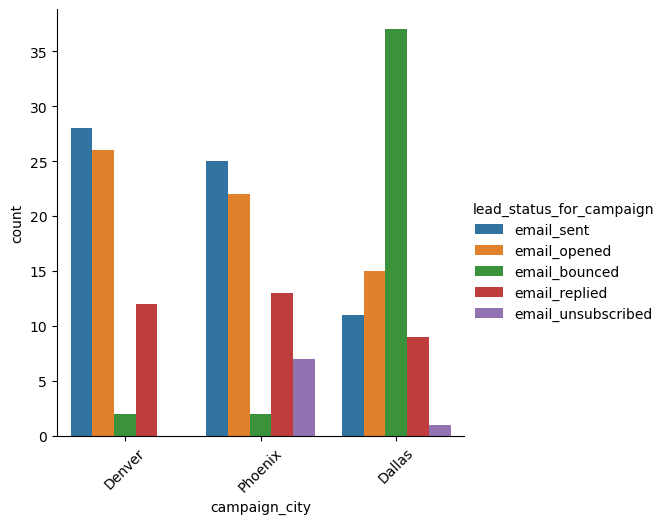

In [21]:
catplot('campaign_city')

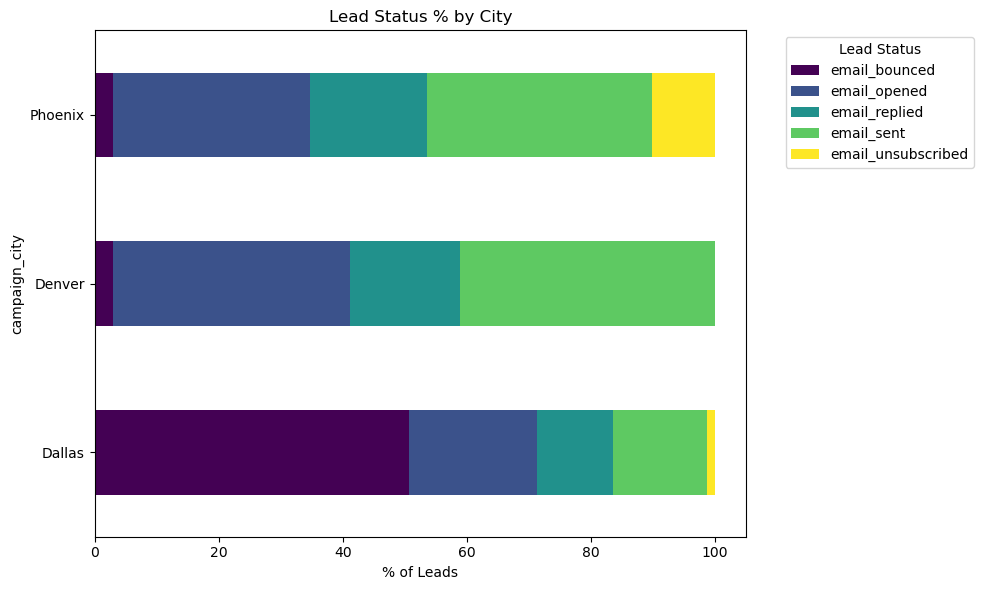

In [22]:
city_leads = df.groupby(['campaign_city', 'lead_status_for_campaign']).size().unstack().fillna(0)
city_leads_percent = city_leads.div(city_leads.sum(axis=1), axis=0) * 100

ax = city_leads_percent.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.title('Lead Status % by City')
plt.xlabel('% of Leads')
plt.legend(title='Lead Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("lead_status_by_city.png", dpi=300, bbox_inches='tight')
plt.show()

 * There is a significant variation in campaign performance across cities. Notably, Dallas had a disproportionately high number of email bounces (37), indicating potential issues with email validity or list quality in that region. In contrast, Denver and Phoenix showed stronger engagement, with higher counts of email opens and replies compared to Dallas.
* Phoenix recorded the highest number of unsubscribes (7), which means that there could be content misalignment or frequency fatigue among leads in that city. 
* Overall, Denver had the most emails sent but unopened, which could mean there is a possible opportunity to improve subject lines or sending times.

### Multivariate Analysis

In [23]:
summary = df.groupby(['campaign_id', 'campaign_city', 'lead_status_for_campaign']).size().unstack(fill_value=0)
summary

lead_status_for_campaign   email_bounced  email_opened  email_replied  \
campaign_id campaign_city                                               
camp_1      Dallas                     6             1              2   
            Denver                     0             6              4   
            Phoenix                    0             1              4   
camp_2      Dallas                     9             5              3   
            Denver                     2             4              1   
            Phoenix                    2             8              1   
camp_3      Dallas                     8             2              0   
            Denver                     0             6              4   
            Phoenix                    0             4              2   
camp_4      Dallas                     8             3              2   
            Denver                     0             4              2   
            Phoenix                    0             5              2   
camp_5      Dallas                     6             4              2   
            Denver                     0             6              1   
            Phoenix                    0             4              4   

lead_status_for_campaign   email_sent  email_unsubscribed  
campaign_id campaign_city                                  
camp_1      Dallas                  1                   0  
            Denver                  7                   0  
            Phoenix                 5                   1  
camp_2      Dallas                  4                   0  
            Denver                  4                   0  
            Phoenix                 5                   2  
camp_3      Dallas                  2                   0  
            Denver                  4                   0  
            Phoenix                 5                   3  
camp_4      Dallas                  2                   1  
            Denver                  5                   0  
            Phoenix                 2                   0  
camp_5      Dallas                  2                   0  
            Denver                  8                   0  
            Phoenix                 8                   1

# Conclusion

Conclusion:
Across all campaigns, Dallas consistently showed high bounce rates (ranging from 6 to 9 emails bounced per campaign), with campaigns 2–4 experiencing the worst deliverability. This strongly suggests issues with the email list quality in Dallas and highlights a need to validate or refresh leads from this city.

Denver and Phoenix outperformed Dallas in terms of engagement. Denver had consistently high open and reply rates, especially in campaigns 1 and 3, indicating good deliverability and relevance of content. Phoenix also had strong reply rates across multiple campaigns, but it showed a relatively higher number of unsubscribes, especially in campaigns 2 and 3 — which may suggest content fatigue or misalignment with expectations in that city.

Campaign 1 stands out for generating the highest replies in Denver and Phoenix, with no bounces, indicating well-targeted messaging and a clean list. In contrast, campaign 2, while showing strong open rates (especially in Phoenix), suffered from poor deliverability in Dallas — indicating that while the subject line and timing were effective, the email list needs improvement.